# Multiple Linear Regression
## Shared bike assignment

#### Problem Statement:


### Import the python libraries needed for shared bike dataset analysis

In [377]:
# Import the libraries needed for shared bikes assignedent
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

## Step 1: Reading and Understanding the Data

### Read the shared bike dataset into pandas dataframe 

In [378]:
# Read the data into panda's data frame
s_bikes_df = pd.read_csv("C:\\Users\\G50-70\\Downloads\\CaseStudys\\SharedBikes\\day.csv")

# Understand the structure of data
# Print shape of data frame
print("Shape of data : ", s_bikes_df.shape)


Shape of data :  (730, 16)


**Data frame has 730 rows and 16 columns**

### User defined functions needed for Bike sharing analysis

In [379]:
#Drop the given list of columns and modifies the dataframe accordingly
def drop_columns_from_dataframe(df, del_lst) : 
  df.drop(del_lst, axis=1, inplace = True)

## Start the EDA on shared bike data

In [380]:
#Print head of the data
print("Head of the data : \n ",s_bikes_df.head())
#Print output of info
print("\nOutput of Info : \n", s_bikes_df.info())

Head of the data : 
     instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
<cla

**Bike Data has**
 1. float64 - 4
 2. int64   - 11
 3. Object  - 1

Convert one object to proper data type

In [381]:
#Convert date object to Pandas date format
s_bikes_df['dteday'] = pd.to_datetime(s_bikes_df['dteday'])
print("Print the head of the data : \n", s_bikes_df.head())
print("Print the info : \n",s_bikes_df.info())

Print the head of the data : 
    instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1 2018-01-01       1   0     1        0        6           0   
1        2 2018-02-01       1   0     1        0        0           0   
2        3 2018-03-01       1   0     1        0        1           1   
3        4 2018-04-01       1   0     1        0        2           1   
4        5 2018-05-01       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
<

C:\Users\G50-70\AppData\Local\Temp\ipykernel_7808\1081211532.py:2: UserWarning: Parsing '13-01-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  s_bikes_df['dteday'] = pd.to_datetime(s_bikes_df['dteday'])
C:\Users\G50-70\AppData\Local\Temp\ipykernel_7808\1081211532.py:2: UserWarning: Parsing '14-01-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  s_bikes_df['dteday'] = pd.to_datetime(s_bikes_df['dteday'])
C:\Users\G50-70\AppData\Local\Temp\ipykernel_7808\1081211532.py:2: UserWarning: Parsing '15-01-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  s_bikes_df['dteday'] = pd.to_datetime(s_bikes_df['dteday'])
C:\Users\G50-70\AppData\Local\Temp\ipykernel_7808\1081211532.py:2: UserWarning: Parsing '16-01-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  s_bikes_df['

**Data has**
 1. float64 - 4
 2. int64   - 11
 3. datetime64  - 1

Now all data are in correct format

In [382]:
print("\nOutput of Describe : \n", s_bikes_df.describe())


Output of Describe : 
           instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std

In [383]:
# Printing number of missing values per column
print("Number of missing values per column : \n", s_bikes_df.isnull().sum(), "\n")

#From looking at output of above line, there are no missing values in the dataframe

Number of missing values per column : 
 instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64 



**Given data does not have missing or null values**

In [384]:
#Chec if data has any duplicate items
s_bikes_df.drop_duplicates(inplace=True)
s_bikes_df.shape

(730, 16)

**Number of rows and coluumns are same before and after dropping duplicates, hence no duplicates present in given bie data set**

## Drop the columns that are not needed for Shared bike dataset analysis

1. Registered and Casual columns : Not needed as these columns gives different catogaries of customers. Our objective is to    find total bikes rented and not catogories of customer, hence these two columns can be dropped 
2. dteday : This columns "dteday" is redundent as month and year together give information on date
3. instant : This is just index column, hence dropping it

In [385]:
drop_list = ["registered", "casual", "dteday", "instant"]
drop_columns_from_dataframe(s_bikes_df,drop_list)
s_bikes_df.shape             

(730, 12)

**Now number of columns are reduced by 4 and it is as we expected. Number of rows remains same**

## Step2 : Visualising the Data

 With data visualization, let us try to understand data in more detail 
- Check if there is some obvious multicollinearity. This is the first place to catch it
- With data visua;ization we can chec how the relation between dependent and independent variables

We will use 'matplotlib' and 'seaborn' libraries for data Visualization


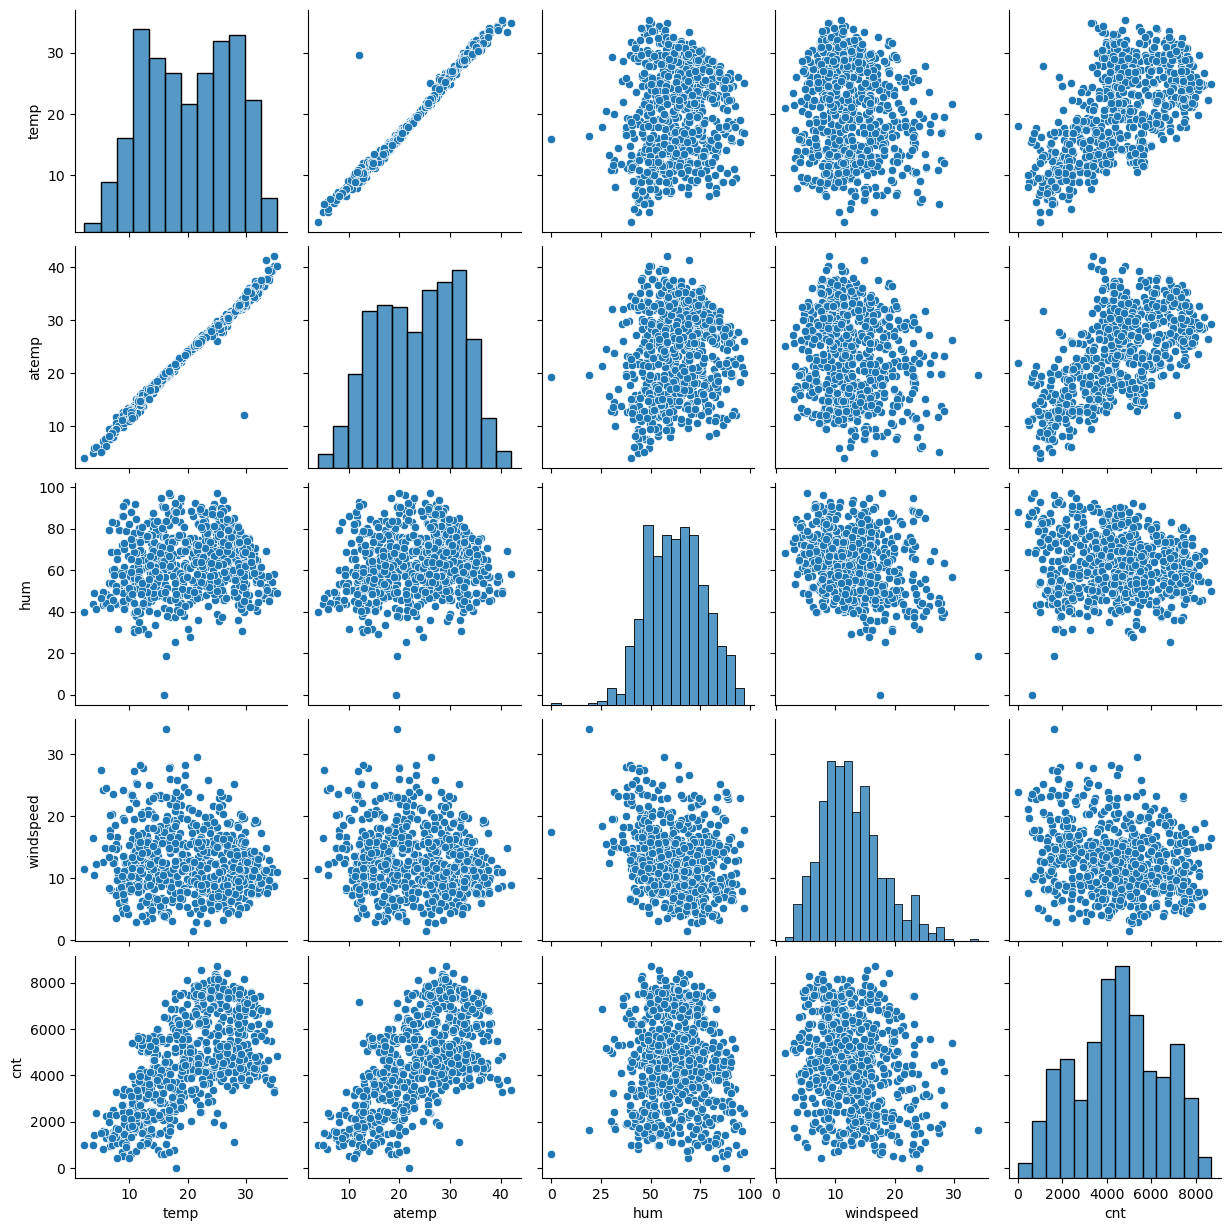

In [386]:
#Now visualize numeric variables 

col_numeric = ["temp", "atemp", "hum", "windspeed", "cnt"]

sns.pairplot(s_bikes_df, vars = col_numeric)
plt.show()

**From above pairplot, it is evidend that there is a linear relation between temp, atemp and cnt**

**Between strong liner relation between temp and atemp** 

**Between cnt and Humidity, windspeed there is week liner relation**

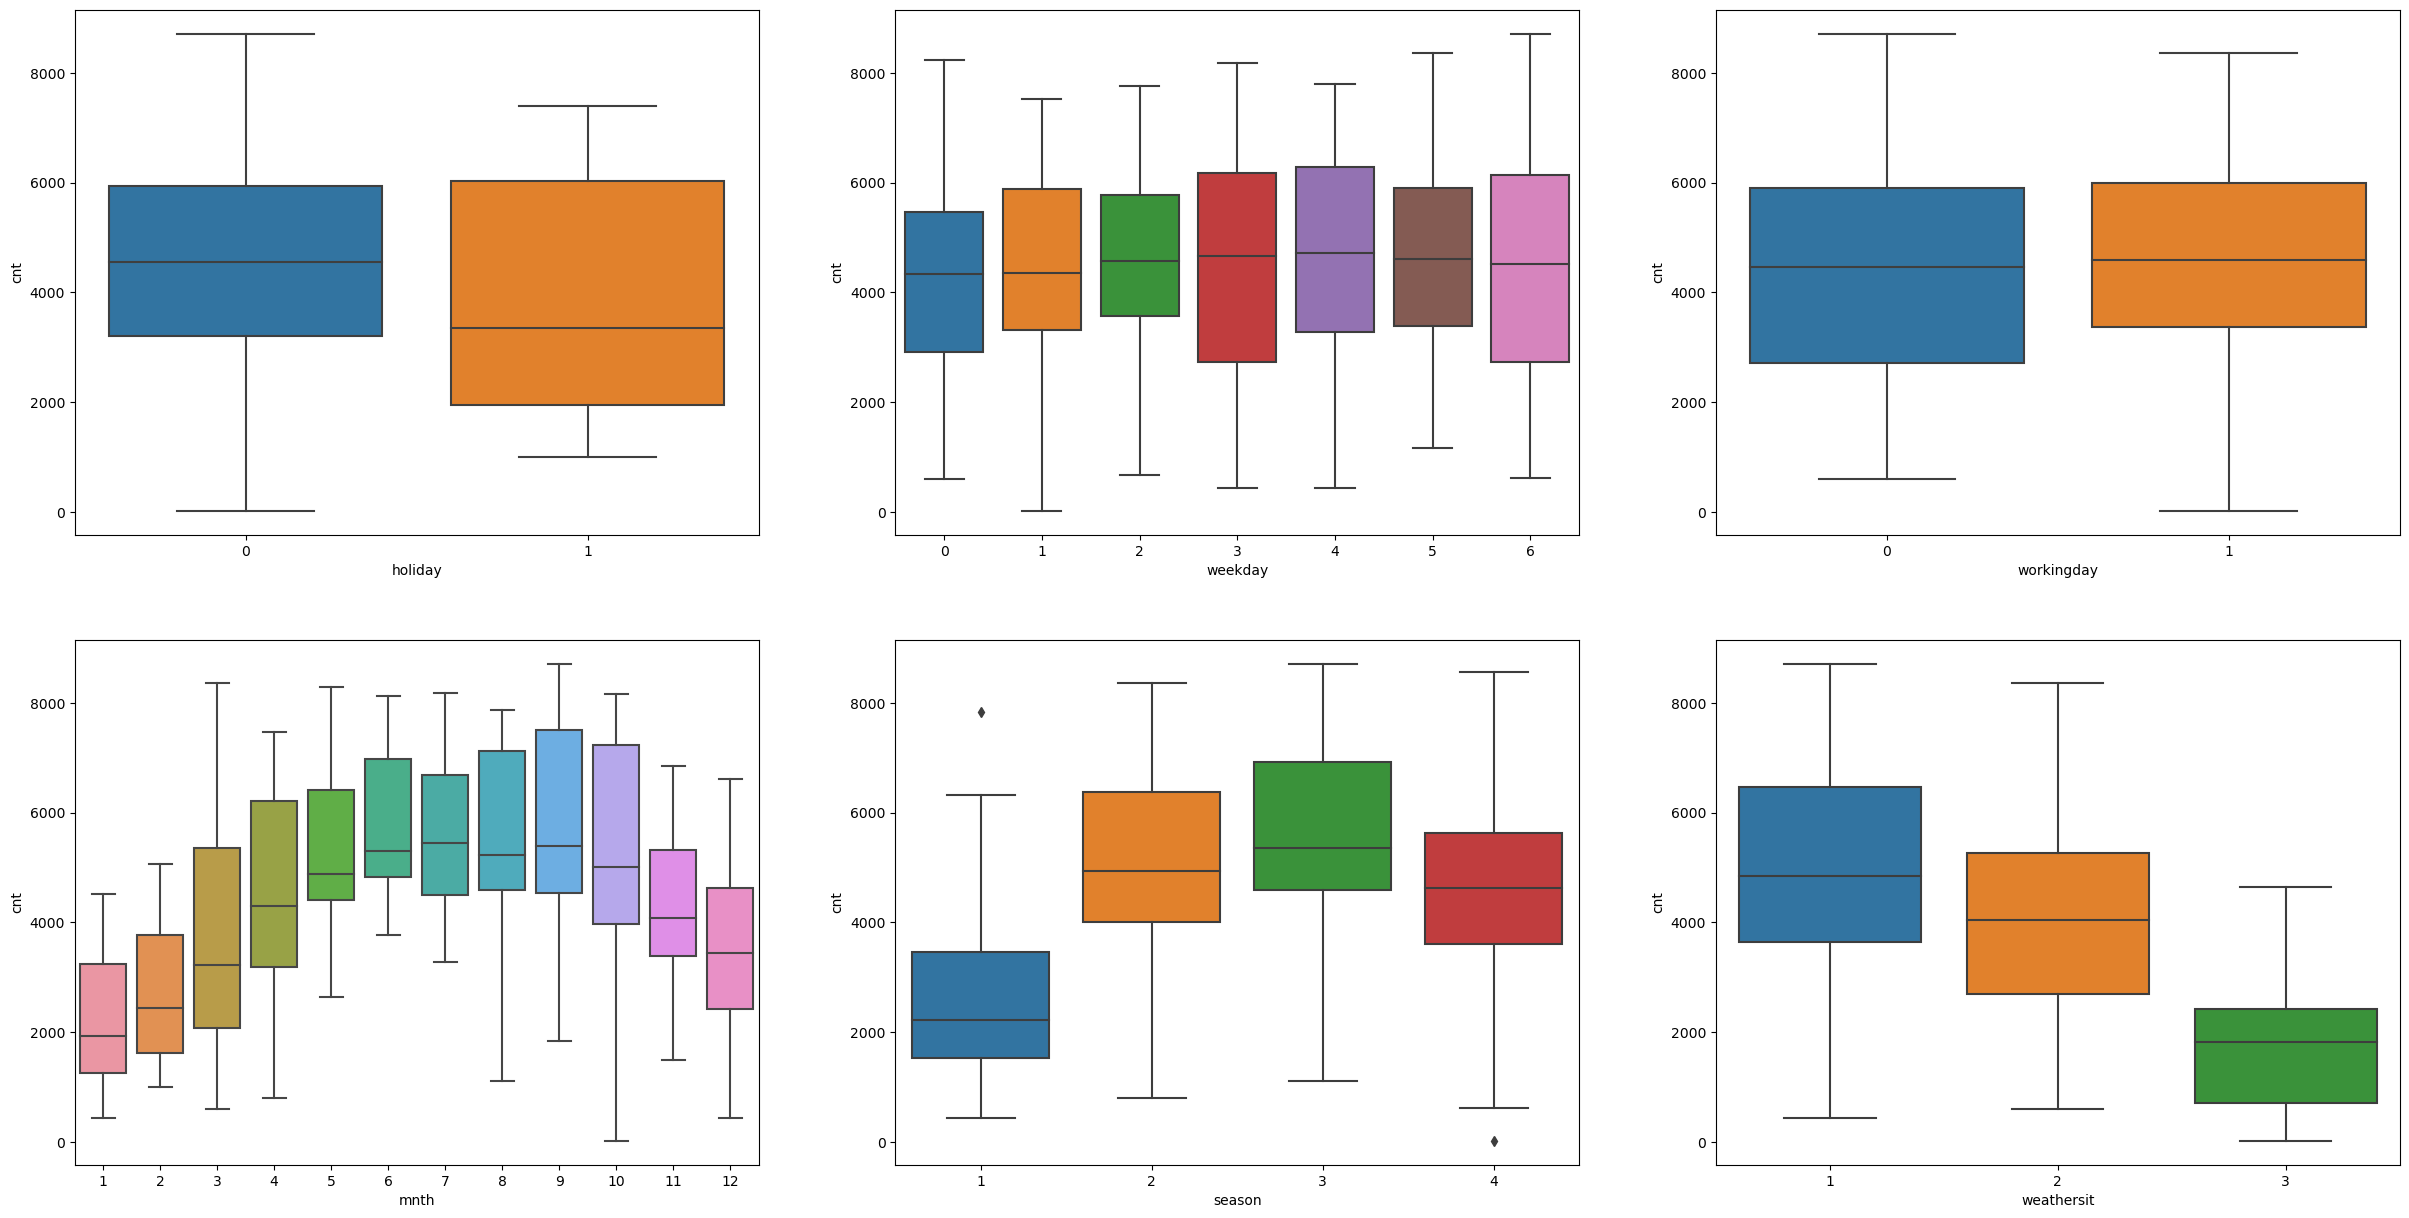

In [387]:
#Now visualize Catagorical variables

col_list = ["season","yr", "mnth", "holiday","weekday"]

plt.figure(figsize=(30, 15))
plt.subplot(2,3,1)
sns.boxplot(x = 'holiday', y = 'cnt', data = s_bikes_df)

plt.subplot(2,3,2)
sns.boxplot(x = 'weekday', y = 'cnt', data = s_bikes_df)

plt.subplot(2,3,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = s_bikes_df)

plt.subplot(2,3,4)
sns.boxplot(x = 'mnth', y = 'cnt', data = s_bikes_df)

plt.subplot(2,3,5)
sns.boxplot(x = 'season', y = 'cnt', data = s_bikes_df)

plt.subplot(2,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = s_bikes_df)

plt.show()


### Below are observations from BOX of catagorical variables 
  **There are 6 catagorical variables**
  1. holiday    : From box plot 1, average bike rented is less during holiday
  2. weekday    : From box plot 2, average bike rented on all week days is almost same
  3. workingday : From box plot 3, average bike rented on working and non-woring is same
  4. mnth       : From box plot 3, average bike rented
  5. season     : 
  6. weathersit : 


## Step 3: Data Preparation

### Creating Dummy variables

  **Will create dummy variables for catagorical variables "weekday", "mnth", "season", "weathersit"**

In [388]:
#First convert catagorical variables to 'category' data type
s_bikes_df['weekday']=s_bikes_df['weekday'].astype('category')
s_bikes_df['mnth']=s_bikes_df['mnth'].astype('category')
s_bikes_df['season']=s_bikes_df['season'].astype('category')
s_bikes_df['weathersit']=s_bikes_df['weathersit'].astype('category')

#Chec if data types are converted before proceeding further 
print("Output of info after data type conversion ", s_bikes_df.info())

# Get the dummy variables for the feature 'weekday' and store it in a new variable - 'status'
#status = pd.get_dummies(housing['weekday']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 71.4 KB
Output of info after data type conversion  None


**Now Catagorical variables are converted to Category data type**


### Now start creating dummy variables 

 **Following items needs to be taken care during dummy variable creation**
 1) First Create Dummy variables
 
 2) if dummy variable as m level the we need m-1 dummyy variables hence Drop first dummy variable 
 
 3) Drop the original variable for which the dummy was created


**Now dummy variables are created and dropped what columns are not needed**

**Data frame has 730 rows and 30 columns after dummy variable creation** 

In [389]:
s_bikes_new = pd.get_dummies(s_bikes_df, drop_first=True)
print("Output of info after dummy variables are created :\n",s_bikes_new.info())
print("\n Shape after dummy variable created : ",s_bikes_new)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

## Step 4: Splitting the Data into Training and Testing Sets
 **Before we build the model it is essential to split the data**
 

### Create split the data into train and test datd in 70:30 ratio 

In [434]:
#import the 'train_test_split'skllean library 

from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(s_bikes_new, train_size = 0.7, test_size = 0.3, random_state = 100)

#Print the shape of Train and Test data frames 
print("Shape of Train data : ", df_train.shape)


print("Shape of Test data : ", df_test.shape)


Shape of Train data :  (510, 30)
Shape of Test data :  (219, 30)


**Number of columns in Train and Test data is 30. This as expected as we do not split the columns**

**Number of rown in test and Train data are splitted in 70:30 ratio**

### Rescaling the Features
As we know scaling does not impact the model. To bring all variables in similar scale is very critical steps 
There are two common ways of rescaling
1. Min-Max scaling
2. Standardisation (mean-0, sigma-1)

This time, we will use MinMax scaling.

In [435]:
#Import MinMaxScaler from sklearn library 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Apply scaler() to all the numeric columns 
df_train[col_numeric] = scaler.fit_transform(df_train[col_numeric])

#Now check the head of the data frame
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,1,0,0,0,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,0,0,0,0,0,0,1,1,0


**After scaling data looks good. All values are between 0 and 1 as expected**

In [436]:
#Check the data summary
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.245098,0.262745,...,0.086275,0.084314,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902,0.343137,0.029412
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.430568,0.440557,...,0.281045,0.278131,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**From the output of data summary, data looks good to start building model**

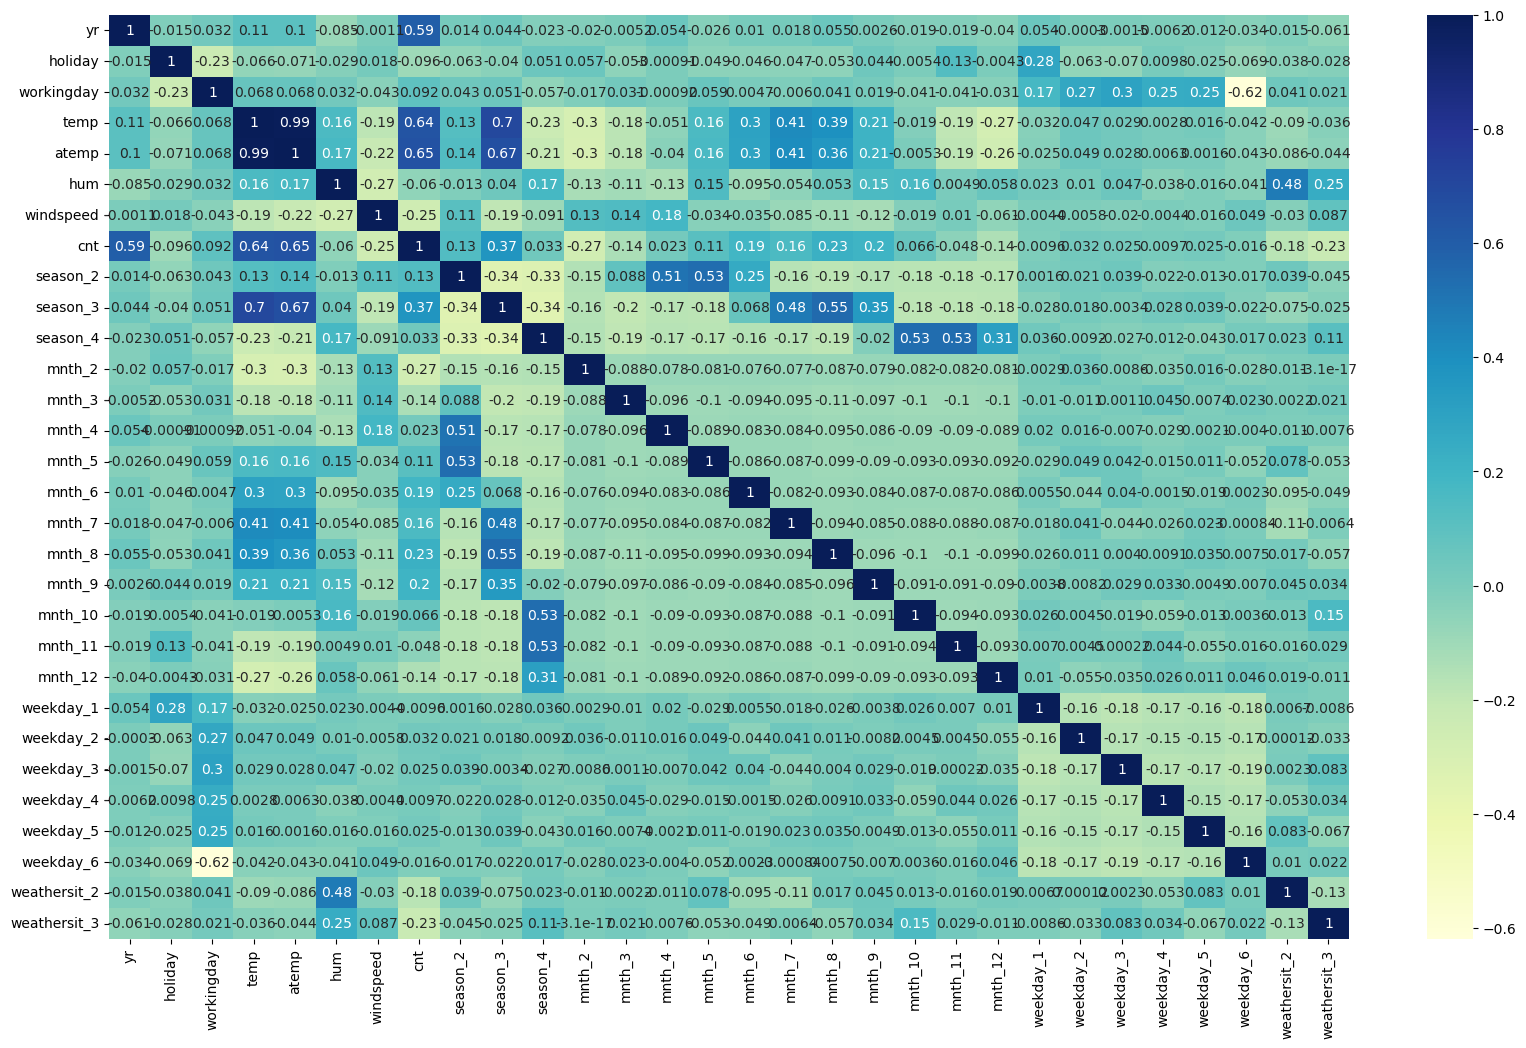

In [437]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 12))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

**From correlation matrix, atemp has highest correlation with cnt. Let's see a pairplot for atemp vs cnt**

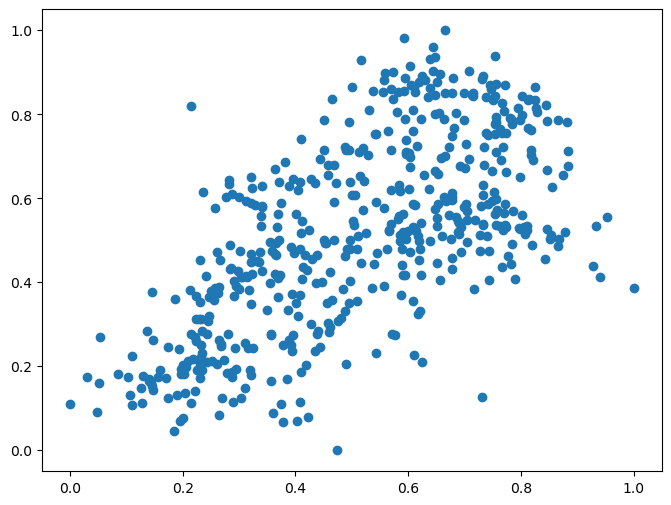

In [438]:
plt.figure(figsize=[8,6])
plt.scatter(df_train.atemp, df_train.cnt)
plt.show()

**Using atemp we'll try to fit a regression line to that**

### Dividing into X and Y sets for the model building

In [439]:
y_train = df_train.pop('cnt')
X_train = df_train

## Step 5: Building a linear model

Fit a regression line through the training data using `statsmodels`. `statsmodels` need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

In [440]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['atemp']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

# Check the Liner regrssion parameters 
lr.params

const    0.162924
atemp    0.683633
dtype: float64

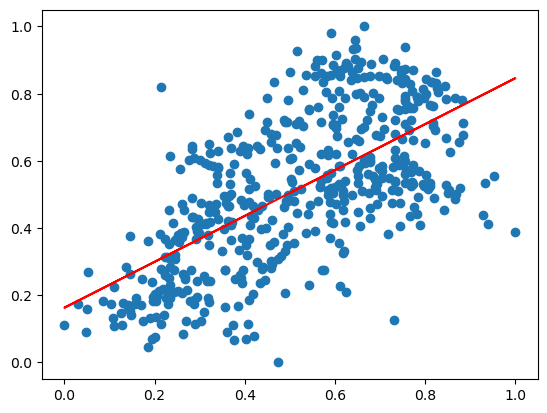

In [441]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.163 + 0.683*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [442]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     364.7
Date:                Wed, 09 Aug 2023   Prob (F-statistic):           1.10e-61
Time:                        17:47:29   Log-Likelihood:                 176.51
No. Observations:                 510   AIC:                            -349.0
Df Residuals:                     508   BIC:                            -340.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1629      0.020      8.199      0.0

### Added another variable which has next highes correlatio 
 **Currenlty R-squared: 0.418 which can be improved by adding other variables**

In [443]:
# Assign all the feature variables to X_train_lm
X_train_lm = X_train[['atemp', 'temp']]

# Build a linear model with new feature set

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const    0.163383
atemp    0.492316
temp     0.181818
dtype: float64

In [444]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     182.5
Date:                Wed, 09 Aug 2023   Prob (F-statistic):           1.95e-60
Time:                        17:47:29   Log-Likelihood:                 176.81
No. Observations:                 510   AIC:                            -347.6
Df Residuals:                     507   BIC:                            -334.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1634      0.020      8.215      0.0

**From Data visualization and correlation metric atemp and temp are highly correlated.**
**That is why adding temp is not improving the model**

**So we can decide not to add temp. Next highest correlatin is with yr**

**So next model, let us drop temp and add yr**

In [445]:
# Assign all the feature variables to X_train_lm
X_train_lm = X_train[['atemp', 'yr']]

# Build a linear model with new feature set

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const    0.072104
atemp    0.625241
yr       0.237817
dtype: float64

In [446]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     579.5
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          1.07e-131
Time:                        17:47:31   Log-Likelihood:                 341.87
No. Observations:                 510   AIC:                            -677.7
Df Residuals:                     507   BIC:                            -665.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0721      0.015      4.810      0.0

**Now R-squared changed to 0.696 from 0.418. This is significant improvement**

**Next let us add sean_3 which has 0.37**

In [447]:
# Assign all the feature variables to X_train_lm
X_train_lm = X_train[['atemp', 'yr', 'season_3']]

# Build a linear model with new feature set
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const       0.052524
atemp       0.687133
yr          0.236802
season_3   -0.044355
dtype: float64

In [448]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     393.3
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          8.89e-132
Time:                        17:47:33   Log-Likelihood:                 345.39
No. Observations:                 510   AIC:                            -682.8
Df Residuals:                     506   BIC:                            -665.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0525      0.017      3.158      0.0

**Very slight improvement in R-squared value. We can continue to add more variable **
We below option to futher improve the model efficiency
1. Continue adding more variable 
2. Start with all variables and drop which have less significance
3. Use RFE and get to minimal feature then optimize from the minimal feature set

Let us go with third option.

## RFE : Recursive feature elimination

Let us use LinearRegression function from SciKit Learn to perform RFE. 

First let us try to reduce to 25 feature set : Got R-squared:        0.841

Next run same code for 20 feare set : Got          R-squared:        0.841

Next run same code for 15 feare set : Got          R-squared:        0.841

Next run same code for 10 feare set : Got          R-squared:        0.846

In [449]:
## Import RFE and LR
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


#Let us run RFE to reduce the number of feature sets to 25, 20, 15, 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, step =10)             
rfe = rfe.fit(X_train, y_train)


In [450]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 3),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 2),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 3),
 ('mnth_3', False, 2),
 ('mnth_4', False, 2),
 ('mnth_5', True, 1),
 ('mnth_6', False, 2),
 ('mnth_7', False, 3),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', False, 2),
 ('mnth_11', False, 3),
 ('mnth_12', False, 3),
 ('weekday_1', False, 3),
 ('weekday_2', False, 3),
 ('weekday_3', False, 3),
 ('weekday_4', False, 3),
 ('weekday_5', False, 3),
 ('weekday_6', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [451]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'season_2', 'season_3',
       'season_4', 'mnth_5', 'mnth_8', 'mnth_9', 'weekday_6', 'weathersit_2',
       'weathersit_3'],
      dtype='object')

In [452]:
X_train.columns[~rfe.support_]

Index(['holiday', 'atemp', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_6', 'mnth_7',
       'mnth_10', 'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics from RFE output 

In [453]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]


# Add a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

#Now run Linear regression model
lm = sm.OLS(y_train,X_train_rfe).fit()

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     193.9
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          1.50e-190
Time:                        17:47:37   Log-Likelihood:                 515.19
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     495   BIC:                            -936.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1821      0.029      6.352   

**Now model got using the feature list from RFE loos good**
Now let us chec VIF to see any other feature can be dropped. 


## Check VIF



In [454]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,52.37
7,season_3,6.03
3,temp,3.62
6,season_2,2.75
4,hum,1.94
8,season_4,1.91
10,mnth_8,1.68
2,workingday,1.65
12,weekday_6,1.65
13,weathersit_2,1.57


## Model  2 : based on features from VIF elimination 

**By looking at VIF, season_3 has VIF more than 5, hence dropping it**


In [455]:
X_train_new = X_train_rfe.drop(["season_3"], axis = 1)

# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

#Check LR2 parameters
lr2.params

const           0.181329
yr              0.229400
workingday      0.051757
temp            0.539280
hum            -0.169644
windspeed      -0.181871
season_2        0.096739
season_4        0.148645
mnth_5          0.018720
mnth_8          0.053829
mnth_9          0.118519
weekday_6       0.061006
weathersit_2   -0.057356
weathersit_3   -0.240013
dtype: float64

In [456]:
# Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     208.5
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          2.13e-191
Time:                        17:47:42   Log-Likelihood:                 514.43
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     496   BIC:                            -941.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1813      0.029      6.325   

In [457]:
## Now check VIF again 

# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
0,const,52.35
4,hum,1.91
6,season_2,1.73
2,workingday,1.65
11,weekday_6,1.65
12,weathersit_2,1.57
3,temp,1.55
8,mnth_5,1.48
9,mnth_8,1.45
7,season_4,1.32


**Now VIF for all values are less than 5**

**P value is high for month 5, Hence drop to get next model**

## Model 3

In [458]:
# Drop mnth_5 for next model 
X_train_new = X_train_new.drop(["mnth_5"], axis = 1)
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()


In [459]:
lr3.params

const           0.177272
yr              0.229083
workingday      0.051970
temp            0.541345
hum            -0.163598
windspeed      -0.183008
season_2        0.102685
season_4        0.148283
mnth_8          0.052604
mnth_9          0.117366
weekday_6       0.060749
weathersit_2   -0.057587
weathersit_3   -0.242126
dtype: float64

In [460]:
# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     225.7
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          2.47e-192
Time:                        17:47:55   Log-Likelihood:                 513.83
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     497   BIC:                            -946.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1773      0.028      6.236   

In [465]:
## Now check VIF again 

# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,51.12
4,hum,1.87
2,workingday,1.65
9,weekday_6,1.64
10,weathersit_2,1.56
3,temp,1.27
7,season_4,1.25
11,weathersit_3,1.24
6,season_2,1.19
5,windspeed,1.18


## Model 4

In [461]:
# Drop mnth_5 for next model 
X_train_new = X_train_new.drop(["mnth_8"], axis = 1)
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()


In [462]:
lr4.params

const           0.169821
yr              0.229437
workingday      0.053557
temp            0.570880
hum            -0.161282
windspeed      -0.186078
season_2        0.089914
season_4        0.140652
mnth_9          0.102541
weekday_6       0.063047
weathersit_2   -0.055314
weathersit_3   -0.243890
dtype: float64

In [463]:
# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     240.6
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          2.89e-191
Time:                        17:48:28   Log-Likelihood:                 508.45
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     498   BIC:                            -942.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1698      0.029      5.937   

In [464]:
## Now check VIF again 

# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,51.12
4,hum,1.87
2,workingday,1.65
9,weekday_6,1.64
10,weathersit_2,1.56
3,temp,1.27
7,season_4,1.25
11,weathersit_3,1.24
6,season_2,1.19
5,windspeed,1.18


## LR4 model is final 
1. Now all P values are in acceptable ranges 
2. VIFs are well below 5
3. R-squared value is 0.845
4. Very low Multicollinearity between the predictors

## Step 6: Residual Analysis of the train data
1. Let us  check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), 
2. let us plot the histogram of the error terms and see what it looks like.

C:\Users\G50-70\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


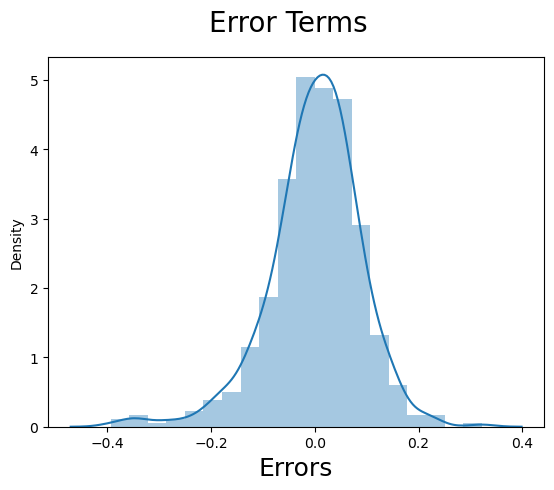

In [467]:
#Predict number bies rented 
y_train_cnt = lr4.predict(X_train_lm4)

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

**From above daigram, errors arenormally distributed. This also suggest we can taem LR4 as final model**

In [468]:
#First we need to scale test data
df_test[col_numeric] = scaler.transform(df_test[col_numeric])
print("Shape of test data after scaling ",df_test.shape)
df_test.describe()

Shape of test data after scaling  (219, 30)


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.264840,0.246575,...,0.073059,0.086758,0.127854,0.164384,0.100457,0.164384,0.178082,0.118721,0.319635,0.027397
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.442259,0.432005,...,0.260830,0.282125,0.334692,0.371472,0.301297,0.371472,0.383458,0.324202,0.467403,0.163612
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Now test data loos fine**

#### Dividing into X_test and y_test

In [469]:
y_test = df_test.pop('cnt')
X_test = df_test

In [470]:
#Selecting the variables that were part of final model.
X_train_new = X_train_new.drop(["const"], axis = 1)
col1=X_train_new.columns
X_test=X_test[col1]

# Adding constant variable to test dataframe
X_test_lm4 = sm.add_constant(X_test)
print("Shape of test data : ",X_test_lm4.shape)
X_test_lm4.info()


Shape of test data :  (219, 12)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         219 non-null    float64
 1   yr            219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   hum           219 non-null    float64
 5   windspeed     219 non-null    float64
 6   season_2      219 non-null    uint8  
 7   season_4      219 non-null    uint8  
 8   mnth_9        219 non-null    uint8  
 9   weekday_6     219 non-null    uint8  
 10  weathersit_2  219 non-null    uint8  
 11  weathersit_3  219 non-null    uint8  
dtypes: float64(4), int64(2), uint8(6)
memory usage: 13.3 KB


In [471]:
X_test_lm4.head()

,const,yr,workingday,temp,hum,windspeed,season_2,season_4,mnth_9,weekday_6,weathersit_2,weathersit_3
184,1.0,0,0,0.831783,0.657364,0.084219,0,0,0,0,1,0
535,1.0,1,1,0.901354,0.610133,0.153728,1,0,0,0,0,0
299,1.0,0,1,0.511964,0.837699,0.334206,0,1,0,0,1,0
221,1.0,0,1,0.881625,0.437098,0.339570,0,0,0,0,0,0
152,1.0,0,1,0.817246,0.314298,0.537414,1,0,0,0,0,0


In [472]:
# Making predictions using the final model (lr3)
y_pred = lr4.predict(X_test_lm4)

## Step 9 : Model evaluation based on test result

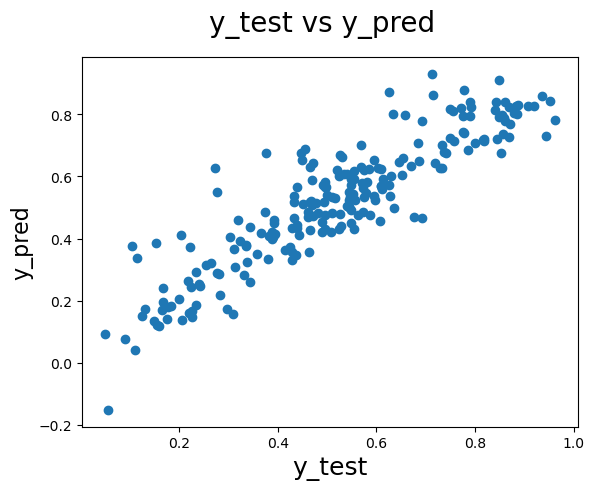

In [473]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

**R^2 Value for TEST**

In [474]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8058858263090349

In [475]:
r2 = 0.8058858263090349
X_test.shape

(219, 11)

In [477]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7955705803641044